In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import cv2 as cv

In [3]:
(x_train,y_train),(x_test,y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [4]:
x_train = x_train/255
x_test = x_test/255

In [5]:
print(x_train[10].min())
print(x_train[10].max())

0.0
1.0


In [6]:
from sklearn import svm

In [7]:
no_of_samples = len(x_train)

In [8]:
x_train = x_train.reshape((no_of_samples, -1))

In [9]:
clasi_svm = svm.LinearSVC(dual=False)
clasi_svm.fit(x_train,y_train)

LinearSVC(dual=False)

In [10]:
x_test = x_test.reshape((len(x_test), -1))


In [24]:
y_pred = clasi_svm.predict(x_test)

In [25]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.97      0.95      0.96      1000
           2       0.72      0.73      0.72      1000
           3       0.82      0.86      0.84      1000
           4       0.72      0.78      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.65      0.51      0.57      1000
           7       0.91      0.94      0.92      1000
           8       0.92      0.94      0.93      1000
           9       0.95      0.94      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test , y_pred)

0.8402

Prediction from test data

In [14]:
predict_1  = clasi_svm.predict(x_test[10].reshape(1,-1))

In [15]:
print(predict_1 , y_test[10])

[4] 4


Predction from google image

In [16]:
from matplotlib.pyplot import *

In [17]:
img_src = 'men-s-striped-stylish-half-sleeve-casual-shirt-351539-1656167635-1.jpeg'
im = cv.imread(img_src , 0)
cv.imshow("", im)

In [18]:
im = cv.resize(im ,(28,28))
print(im.shape)
cv.imshow(" ",im)

(28, 28)


In [19]:

pred = clasi_svm.predict(im.reshape(1,-1))

print(pred)

[8]


confustion matrix

In [20]:
class_names = ['T-Shirt' , 'Trouser' , 'Pullover' , 
               'Dress' , 'Coat' , 'Sandal' , 'Shirt' ,
                'Sneaker' , 'Bag' , 'Ankle Boot']

In [23]:
y_test.shape  , predict_1.shape  

((10000,), (1,))

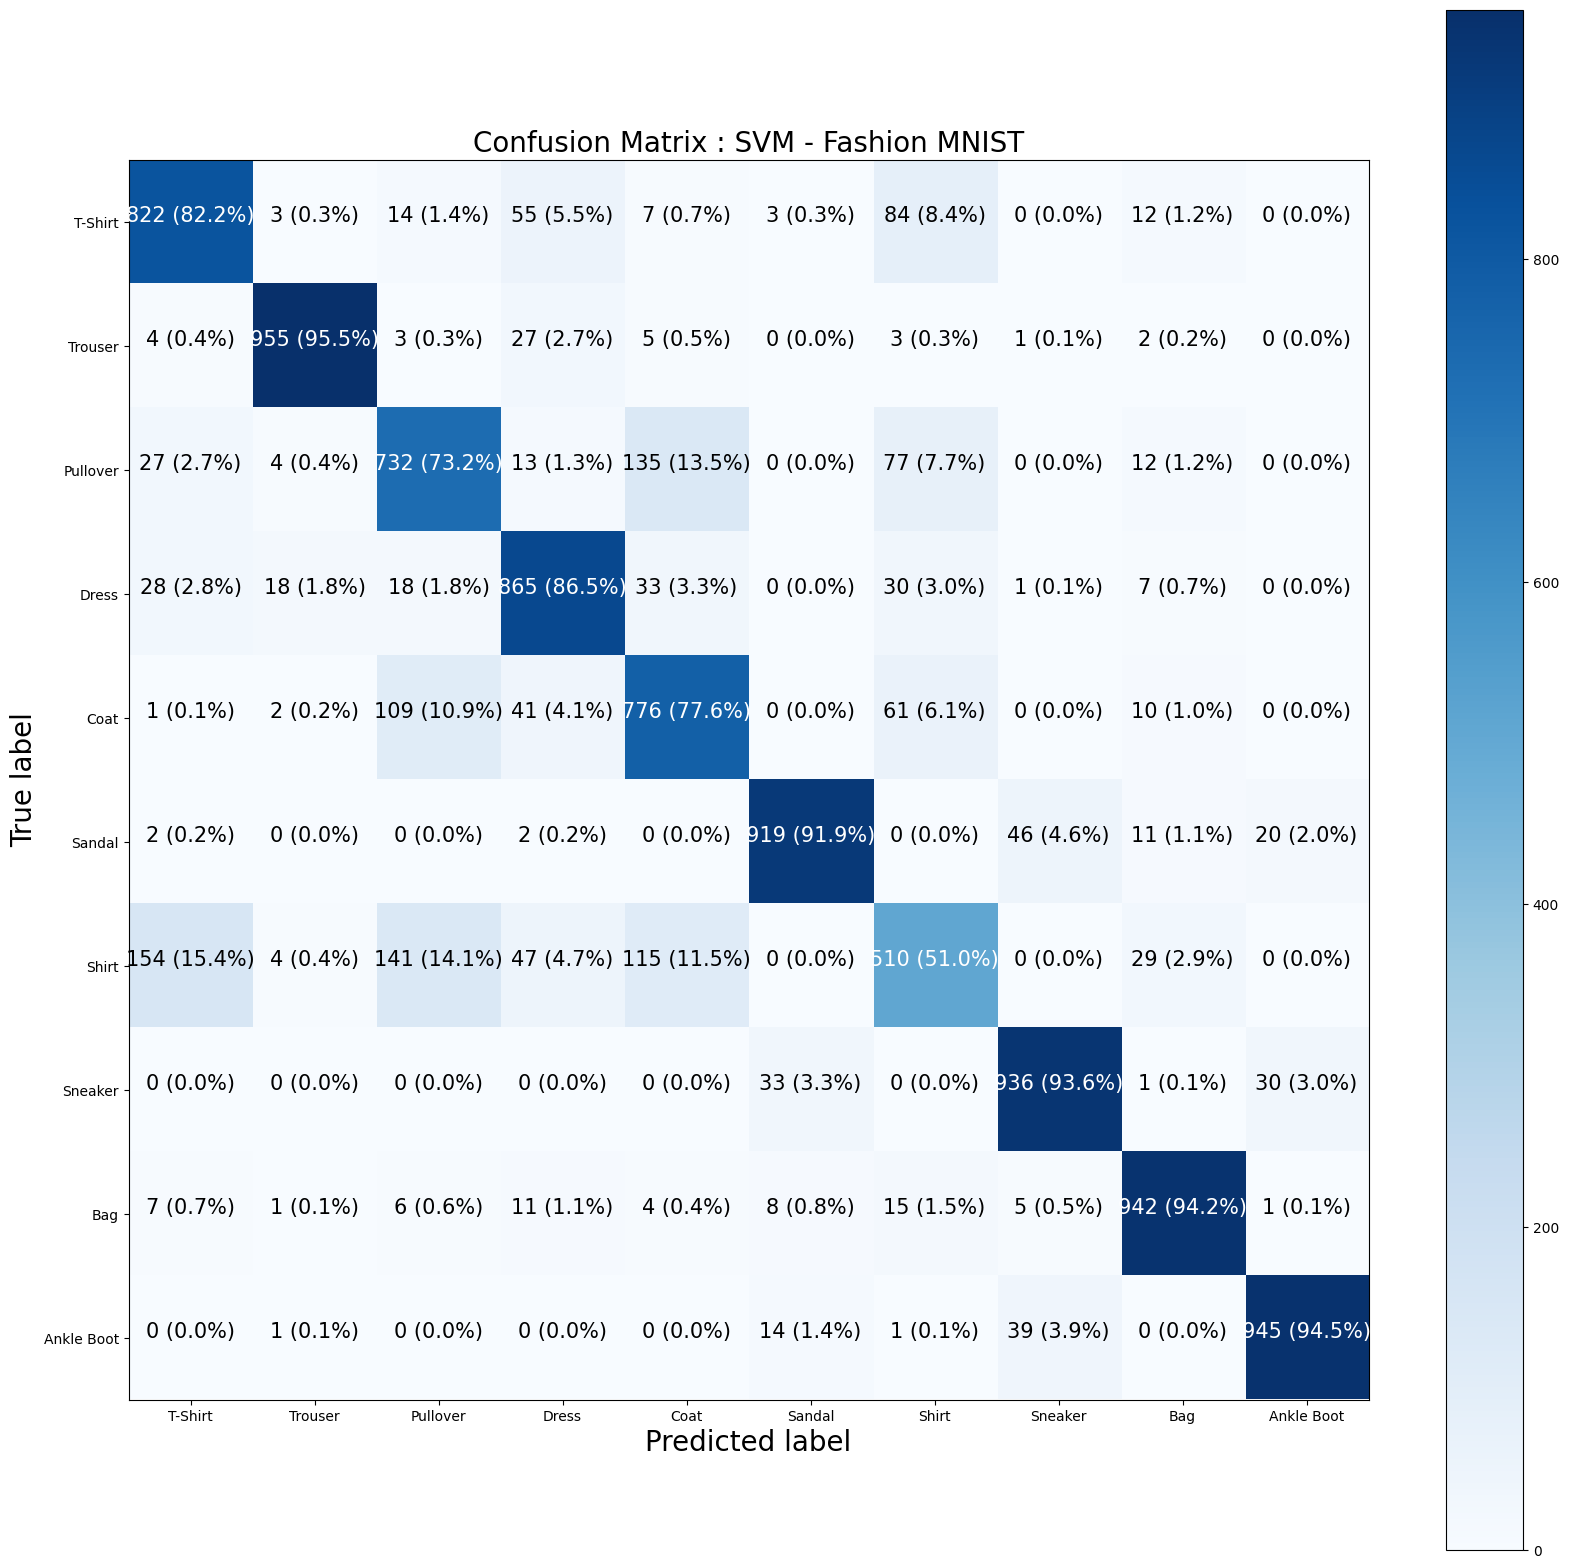

: 

In [29]:
import itertools
from sklearn.metrics import confusion_matrix

figsize = (20, 20)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred )
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes
classes = True

if classes:
  labels = class_names
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix : SVM - Fashion MNIST",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)
threshold = (cm.max() + cm.min()) / 2.

plt.grid(False)

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

In [ ]:
import pickle

pkl_file = "joblib_model.pkl"
with open(pkl_file , 'wb') as file:
     pickle.dump(clasi_svm, file )

: 